**statsforecast : Libreria para el ajuste de modelos de forecasting**

Los codigos ejemplos desarrollados tienen como base los codigos ejemplo de las siguientes paginas (y paginas vinculadas):<br>
- https://nixtla.github.io/statsforecast/examples/getting_started_with_auto_arima_and_ets.html

# Parte 1 - Modelo simple

In [174]:
# Librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, ETS
from statsforecast.utils import AirPassengersDF
from statsforecast.models import SeasonalNaive, Naive

import warnings
warnings.filterwarnings('ignore')

In [175]:
# leer datos

df = AirPassengersDF
df

,unique_id,ds,y
0,1.0,1949-01-31,112.0
1,1.0,1949-02-28,118.0
2,1.0,1949-03-31,132.0
3,1.0,1949-04-30,129.0
4,1.0,1949-05-31,121.0
...,...,...,...
139,1.0,1960-08-31,606.0
140,1.0,1960-09-30,508.0
141,1.0,1960-10-31,461.0
142,1.0,1960-11-30,390.0


<Figure size 1000x300 with 0 Axes>

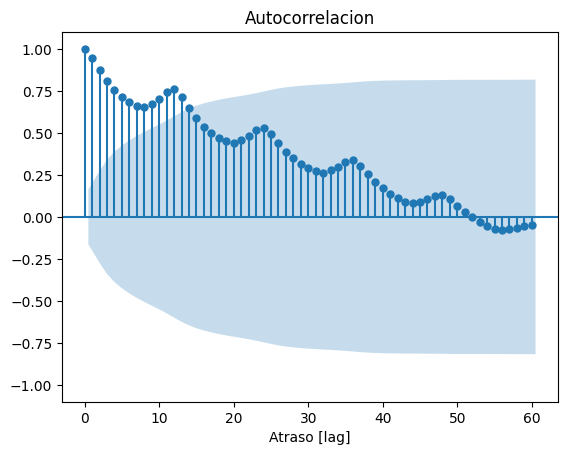

<Figure size 1000x300 with 0 Axes>

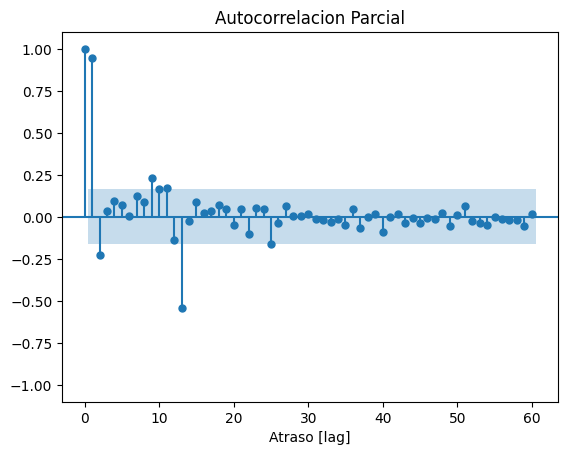

In [178]:
# Visualizar autocorrelaciones

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

n_lags = 60
figx = 10
figy = 3

df1 = df.copy()
df1.index = df1.ds
df1 = df1["y"]

plt.figure(figsize=(figx,figy))
plot_acf(df1,lags=n_lags)
plt.ylim([-1.1,1.1])
plt.title('Autocorrelacion')
plt.xlabel('Atraso [lag]')
plt.show()

plt.figure(figsize=(figx,figy))
plot_pacf(df1,lags=n_lags,method='ywm')
plt.ylim([-1.1,1.1])
plt.title('Autocorrelacion Parcial')
plt.xlabel('Atraso [lag]')
plt.show()

In [157]:
# Dividir datos Train-Test

# Generar split de dataset
fecha = '1959-12-31'

train_df = df[df.ds<=fecha].copy()
test_df = df[df.ds>fecha].copy()

train_df.shape, test_df.shape

((132, 3), (12, 3))

NOTA: La cantidad de puntos en el Test puede afectar la predicción con la libreria statsforecast debido a que con pocos puntos puede no llegar a ajustar el modelo y arroje error a la salida.

In [158]:
# Entrenar modelo segun Train-Test

# Parametros del modelo
season_length = 12
predecir_puntos = test_df.shape[0] # puntos nuevos a predecir

# definir
models = [
    AutoARIMA(season_length=season_length),
    ETS(season_length=season_length, model='ZMZ'),
    SeasonalNaive(season_length=season_length)
]

# modelo
model = StatsForecast(
    df=train_df, 
    models=models,
    freq='M')

# predecir
pred_df = model.forecast(predecir_puntos).reset_index()
pred_df.head()

,unique_id,ds,AutoARIMA,ETS,SeasonalNaive
0,1.0,1960-01-31,424.160156,419.163574,360.0
1,1.0,1960-02-29,407.081696,416.904449,342.0
2,1.0,1960-03-31,470.860535,480.243378,406.0
3,1.0,1960-04-30,460.913605,461.996887,396.0
4,1.0,1960-05-31,484.900879,463.853241,420.0


In [159]:
# Se puede aplicar forecast con intervalos de confianza
model.forecast(predecir_puntos,level=[90]) # en levels se colocan los niveles deseados level=[70,80,90,95,etc]

,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90,ETS,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-hi-90
unique_id,,,,,,,,
1.0,1960-01-31,424.160156,406.850830,441.469482,419.163574,360.0,303.173157,416.826843
1.0,1960-02-29,407.081696,385.340607,428.822754,416.904449,342.0,285.173157,398.826843
1.0,1960-03-31,470.860535,444.919067,496.801971,480.243378,406.0,349.173157,462.826843
1.0,1960-04-30,460.913605,431.476746,490.350464,461.996887,396.0,339.173157,452.826843
1.0,1960-05-31,484.900879,452.317139,517.484619,463.853241,420.0,363.173157,476.826843
1.0,1960-06-30,536.903931,501.456970,572.350891,527.359131,472.0,415.173157,528.826843
1.0,1960-07-31,612.903198,574.806396,651.000000,586.639160,548.0,491.173157,604.826843
1.0,1960-08-31,623.903381,583.329712,664.476990,585.093384,559.0,502.173157,615.826843
1.0,1960-09-30,527.903320,484.995483,570.811157,512.351868,463.0,406.173157,519.826843


Nota: En caso arroje error, aumentar la cantidad de puntos de Test

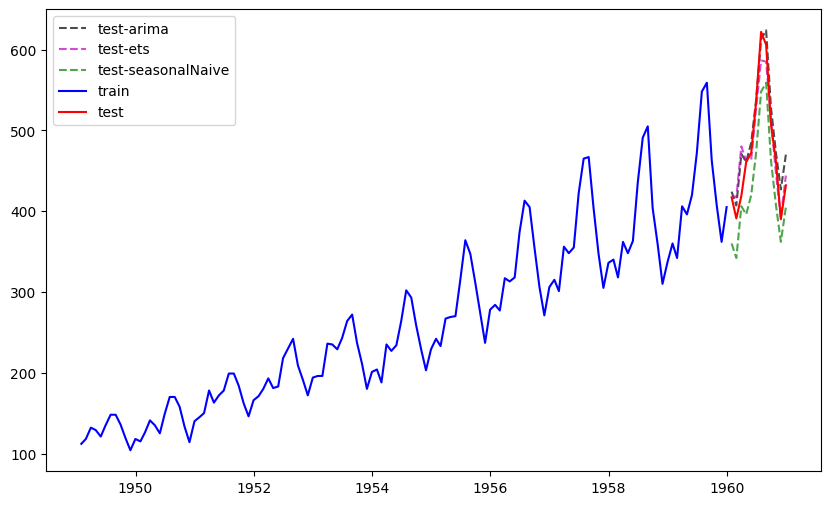

In [160]:
# Visualizar prediccion

plt.figure(figsize=(10,6))
v1 = train_df.copy()
v2 = test_df.copy()
v3 = pred_df.copy()
plt.plot(v3['ds'],v3['AutoARIMA'],'--k',label='test-arima',alpha=0.7)
plt.plot(v3['ds'],v3['ETS'],'--m',label='test-ets',alpha=0.7)
plt.plot(v3['ds'],v3['SeasonalNaive'],'--g',label='test-seasonalNaive',alpha=0.7)
plt.plot(v1['ds'],v1['y'],'-b',label='train')
plt.plot(v2['ds'],v2['y'],'-r',label='test')
plt.legend()
plt.show()

In [161]:
# Evaluar el rendimiento del modelo

# MAE: Valor de error absoluto promedio
def mae(y_hat, y_true):
    return np.mean(np.abs(y_hat-y_true))

# MAPE: Valor de error porcentual absoluto promedio
def mape(y_hat, y_true):
    return np.mean(np.abs(100.*(y_hat-y_true)/(y_true + 1e-5)))

print(' *** Resultados en el horizonte (Test) *** ')
print('ETS   MAE : %0.3f' % mae(v3["ETS"].values, v2["y"].values))
print('ARIMA MAE : %0.3f' % mae(v3["AutoARIMA"].values, v2["y"].values))
print('Naive MAE : %0.3f' % mae(v3["SeasonalNaive"].values, v2["y"].values))
print('--------------------')
print('ETS   MAPE: %0.3f' % mape(v3["ETS"].values, v2["y"].values),'%')
print('ARIMA MAPE: %0.3f' % mape(v3["AutoARIMA"].values, v2["y"].values),'%')
print('Naive MAPE: %0.3f' % mape(v3["SeasonalNaive"].values, v2["y"].values),'%')

 *** Resultados en el horizonte (Test) *** 
ETS   MAE : 16.222
ARIMA MAE : 18.551
Naive MAE : 47.833
--------------------
ETS   MAPE: 3.452 %
ARIMA MAPE: 4.188 %
Naive MAPE: 9.988 %


Observamos que el modelo ETS (Exponential smoothing) tiene el mejor rendimiento respecto al modelo ARIMA tanto en MAE como MAPE

# Parte 2 - Adicion de variables exogenas

**Agregar variables exogenas al modelo**

In [136]:
# Crear variables exogenas para train (X) - Nuevas columnas en X

# Crear variables nuevas
train_df['trend'] = np.arange(1,train_df.shape[0] + 1)
train_df['intercept'] = np.ones(train_df.shape[0])
train_df['month'] = train_df['ds'].dt.month

# Codificar variable "month" mediante one-hot encoder
train_df = pd.get_dummies(train_df, columns=['month'], drop_first=True)
train_df

,unique_id,ds,y,trend,intercept,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.0,1949-01-31,112.0,1,1.0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1949-02-28,118.0,2,1.0,1,0,0,0,0,0,0,0,0,0,0
2,1.0,1949-03-31,132.0,3,1.0,0,1,0,0,0,0,0,0,0,0,0
3,1.0,1949-04-30,129.0,4,1.0,0,0,1,0,0,0,0,0,0,0,0
4,1.0,1949-05-31,121.0,5,1.0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,1.0,1959-08-31,559.0,128,1.0,0,0,0,0,0,0,1,0,0,0,0
128,1.0,1959-09-30,463.0,129,1.0,0,0,0,0,0,0,0,1,0,0,0
129,1.0,1959-10-31,407.0,130,1.0,0,0,0,0,0,0,0,0,1,0,0
130,1.0,1959-11-30,362.0,131,1.0,0,0,0,0,0,0,0,0,0,1,0


In [137]:
# Crear variables exogenas para test (X) - Nuevas columnas en X

# copiar datos
xreg_test = test_df[["unique_id","ds"]].copy()

# crear variables
xreg_test['trend'] = np.arange(train_df.shape[0]+1 ,test_df.shape[0] + train_df.shape[0] +1)
xreg_test['intercept'] = np.ones(pred_df.shape[0])
xreg_test['month'] = xreg_test['ds'].dt.month

# categorizar variable "month" con one-hot encoder
xreg_test = pd.get_dummies(xreg_test, columns=['month'], drop_first=True)
xreg_test.head()

,unique_id,ds,trend,intercept,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
132,1.0,1960-01-31,133,1.0,0,0,0,0,0,0,0,0,0,0,0
133,1.0,1960-02-29,134,1.0,1,0,0,0,0,0,0,0,0,0,0
134,1.0,1960-03-31,135,1.0,0,1,0,0,0,0,0,0,0,0,0
135,1.0,1960-04-30,136,1.0,0,0,1,0,0,0,0,0,0,0,0
136,1.0,1960-05-31,137,1.0,0,0,0,1,0,0,0,0,0,0,0


In [138]:
# Predecir con modelo

model = StatsForecast(
    df=train_df, 
    models=models, 
    freq='M')

# prediccion
pred_xreg = model.forecast(predecir_puntos, X_df=xreg_test)
pred_xreg = pred_xreg.reset_index()
pred_xreg.head()

,unique_id,ds,AutoARIMA,ETS,SeasonalNaive
0,1.0,1960-01-31,389.041046,419.163574,360.0
1,1.0,1960-02-29,377.125366,416.904449,342.0
2,1.0,1960-03-31,433.105286,480.243378,406.0
3,1.0,1960-04-30,427.590454,461.996887,396.0
4,1.0,1960-05-31,445.866333,463.853241,420.0


In [140]:
# Se puede aplicar forecast con intervalos de confianza
model.forecast(predecir_puntos, X_df=xreg_test,level=[90]) # en levels se colocan los niveles deseados level=[70,80,90,95,etc]

,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90,ETS,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-hi-90
unique_id,,,,,,,,
1.0,1960-01-31,389.041046,-124218.546875,124996.625000,419.163574,360.0,303.173157,416.826843
1.0,1960-02-29,377.125366,-124230.460938,124984.710938,416.904449,342.0,285.173157,398.826843
1.0,1960-03-31,433.105286,-124174.484375,125040.695312,480.243378,406.0,349.173157,462.826843
1.0,1960-04-30,427.590454,-124179.992188,125035.179688,461.996887,396.0,339.173157,452.826843
1.0,1960-05-31,445.866333,-124161.718750,125053.453125,463.853241,420.0,363.173157,476.826843
1.0,1960-06-30,496.270264,-124111.312500,125103.859375,527.359131,472.0,415.173157,528.826843
1.0,1960-07-31,569.760620,-124037.828125,125177.343750,586.639160,548.0,491.173157,604.826843
1.0,1960-08-31,590.763794,-124016.820312,125198.351562,585.093384,559.0,502.173157,615.826843
1.0,1960-09-30,502.128662,-124105.460938,125109.718750,512.351868,463.0,406.173157,519.826843


Nota: En caso arroje error, aumentar la cantidad de puntos de Test

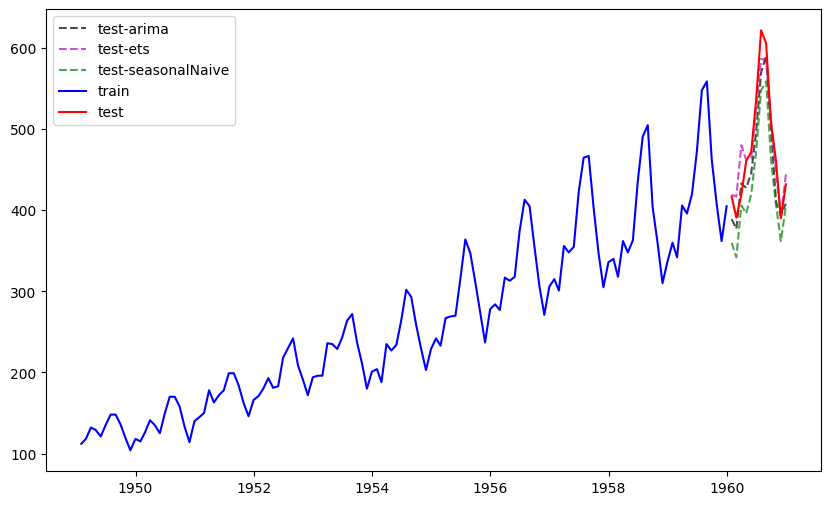

In [141]:
# Visualizar prediccion

plt.figure(figsize=(10,6))
v1 = train_df.copy()
v2 = test_df.copy()
v3 = pred_xreg.copy()
plt.plot(v3['ds'],v3['AutoARIMA'],'--k',label='test-arima',alpha=0.7)
plt.plot(v3['ds'],v3['ETS'],'--m',label='test-ets',alpha=0.7)
plt.plot(v3['ds'],v3['SeasonalNaive'],'--g',label='test-seasonalNaive',alpha=0.7)
plt.plot(v1['ds'],v1['y'],'-b',label='train')
plt.plot(v2['ds'],v2['y'],'-r',label='test')
plt.legend()
plt.show()

In [142]:
# Evaluar el rendimiento del modelo

# MAE: Valor de error absoluto promedio
def mae(y_hat, y_true):
    return np.mean(np.abs(y_hat-y_true))

# MAPE: Valor de error porcentual absoluto promedio
def mape(y_hat, y_true):
    return np.mean(np.abs(100.*(y_hat-y_true)/(y_true + 1e-5)))

print(' *** Resultados en el horizonte (Test) *** ')
print('ETS   MAE : %0.3f' % mae(v3["ETS"].values, v2["y"].values))
print('ARIMA MAE : %0.3f' % mae(v3["AutoARIMA"].values, v2["y"].values))
print('Naive MAE : %0.3f' % mae(v3["SeasonalNaive"].values, v2["y"].values))
print('--------------------')
print('ETS   MAPE: %0.3f' % mape(v3["ETS"].values, v2["y"].values),'%')
print('ARIMA MAPE: %0.3f' % mape(v3["AutoARIMA"].values, v2["y"].values),'%')
print('Naive MAPE: %0.3f' % mape(v3["SeasonalNaive"].values, v2["y"].values),'%')

 *** Resultados en el horizonte (Test) *** 
ETS   MAE : 16.222
ARIMA MAE : 25.510
Naive MAE : 47.833
--------------------
ETS   MAPE: 3.452 %
ARIMA MAPE: 5.272 %
Naive MAPE: 9.988 %


Observamos que ETS en este caso mantiene un mejor rendimiento respecto a ARIMA

___

# Parte 3 - Modelo con datos faltantes

**Ajuste de modelo con datos faltantes en Train**

La idea es probar el ajuste del modelo cuando aleatoriamente se remueven datos (puntos) de Train. Ver como la falta de un dato influencia el rendimiento del modelo, con esto la robustez o suceptibilidad del mismo se va evidenciar.

Modelo simple



------------------------------
Cantidad puntos remueve:  0
------------------------------


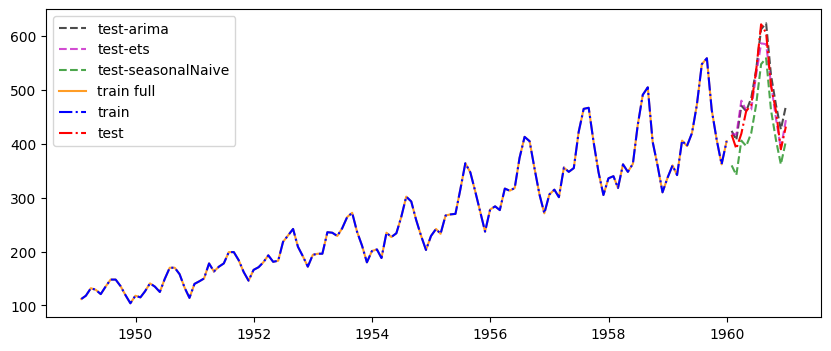

 *** Resultados en el horizonte (Test) *** 
ETS   MAE : 16.222
ARIMA MAE : 18.551
Naive MAE : 47.833
ETS   MAPE: 3.452 %
ARIMA MAPE: 4.188 %
Naive MAPE: 9.988 %


------------------------------
Cantidad puntos remueve:  5
------------------------------


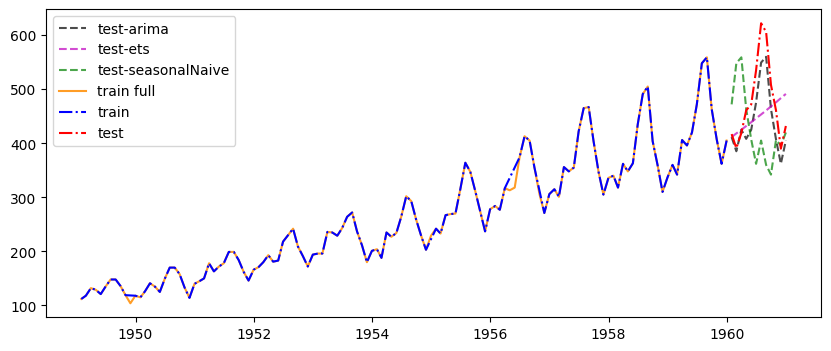

 *** Resultados en el horizonte (Test) *** 
ETS   MAE : 59.263
ARIMA MAE : 37.380
Naive MAE : 107.833
ETS   MAPE: 11.624 %
ARIMA MAPE: 7.491 %
Naive MAPE: 21.475 %


------------------------------
Cantidad puntos remueve:  10
------------------------------


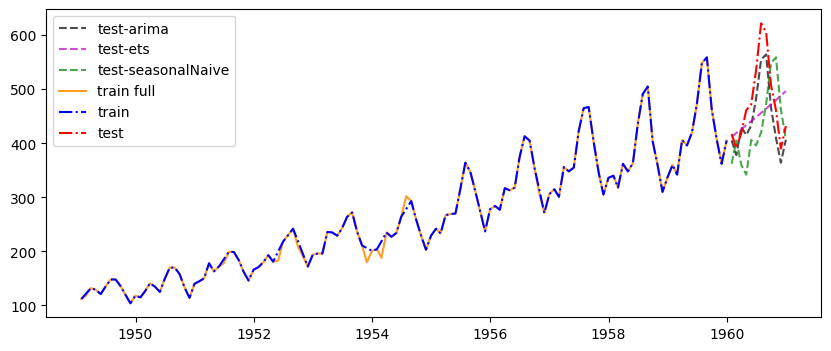

 *** Resultados en el horizonte (Test) *** 
ETS   MAE : 59.265
ARIMA MAE : 35.497
Naive MAE : 85.333
ETS   MAPE: 11.690 %
ARIMA MAPE: 7.189 %
Naive MAPE: 17.071 %


------------------------------
Cantidad puntos remueve:  15
------------------------------


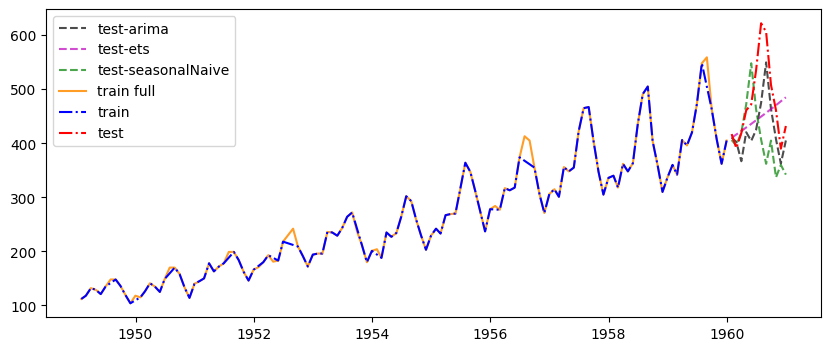

 *** Resultados en el horizonte (Test) *** 
ETS   MAE : 59.467
ARIMA MAE : 53.696
Naive MAE : 81.833
ETS   MAPE: 11.578 %
ARIMA MAPE: 10.607 %
Naive MAPE: 15.553 %


------------------------------
Cantidad puntos remueve:  20
------------------------------


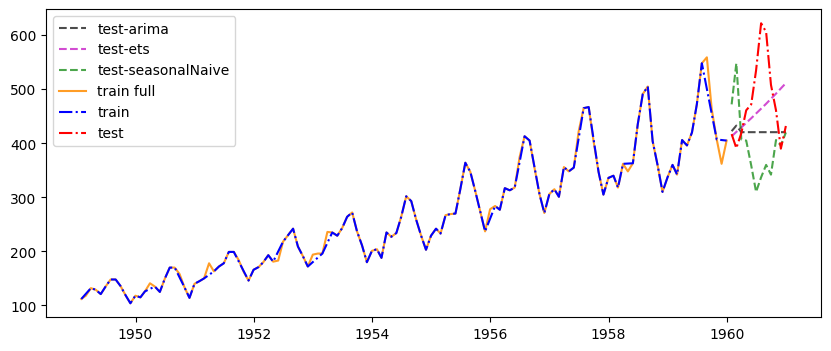

 *** Resultados en el horizonte (Test) *** 
ETS   MAE : 59.290
ARIMA MAE : 67.654
Naive MAE : 115.667
ETS   MAPE: 11.880 %
ARIMA MAPE: 12.739 %
Naive MAPE: 22.474 %


------------------------------
Cantidad puntos remueve:  25
------------------------------


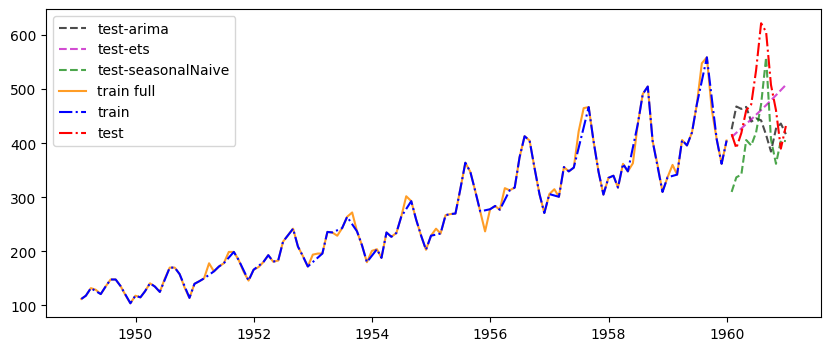

 *** Resultados en el horizonte (Test) *** 
ETS   MAE : 59.528
ARIMA MAE : 70.578
Naive MAE : 77.000
ETS   MAPE: 11.878 %
ARIMA MAPE: 13.721 %
Naive MAPE: 15.911 %


------------------------------
Cantidad puntos remueve:  30
------------------------------


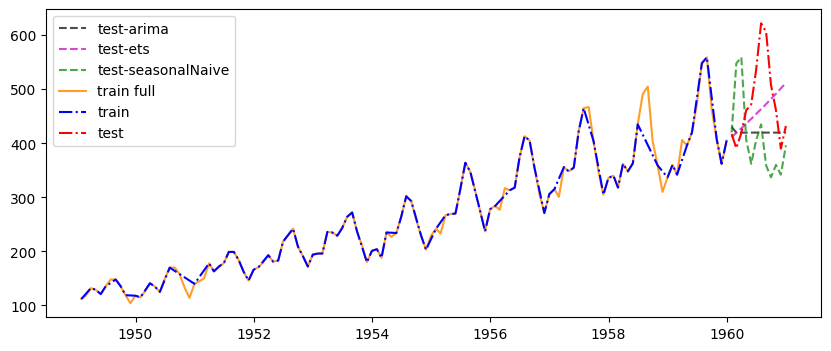

 *** Resultados en el horizonte (Test) *** 
ETS   MAE : 59.622
ARIMA MAE : 67.636
Naive MAE : 115.333
ETS   MAPE: 11.939 %
ARIMA MAPE: 12.695 %
Naive MAPE: 23.387 %


------------------------------
Cantidad puntos remueve:  35
------------------------------


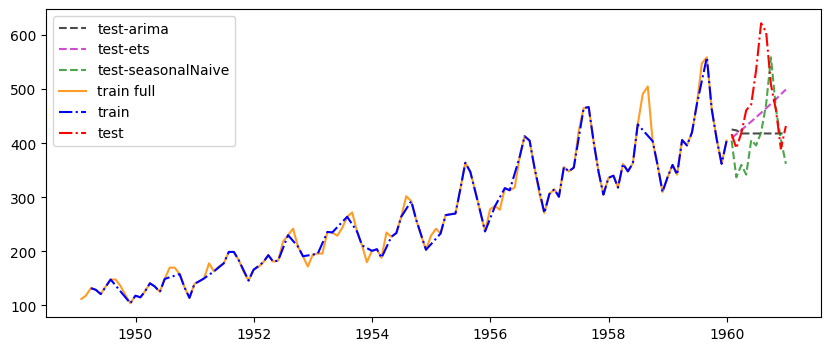

 *** Resultados en el horizonte (Test) *** 
ETS   MAE : 59.769
ARIMA MAE : 68.524
Naive MAE : 77.083
ETS   MAPE: 11.811 %
ARIMA MAPE: 12.867 %
Naive MAPE: 15.181 %


------------------------------
Cantidad puntos remueve:  40
------------------------------


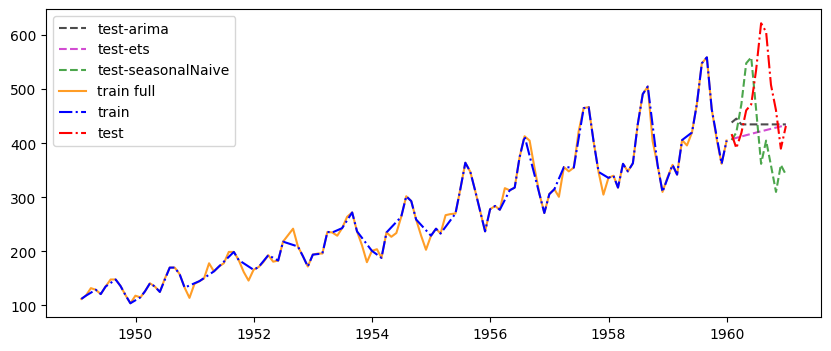

 *** Resultados en el horizonte (Test) *** 
ETS   MAE : 65.673
ARIMA MAE : 63.360
Naive MAE : 101.667
ETS   MAPE: 12.307 %
ARIMA MAPE: 12.139 %
Naive MAPE: 19.921 %


------------------------------
Cantidad puntos remueve:  45
------------------------------


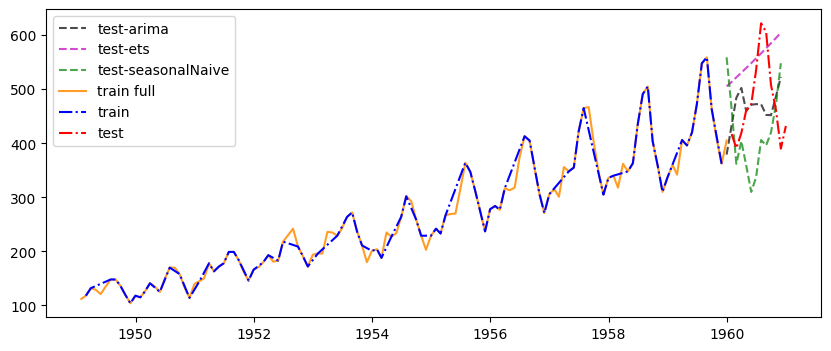

 *** Resultados en el horizonte (Test) *** 
ETS   MAE : 94.791
ARIMA MAE : 66.524
Naive MAE : 125.167
ETS   MAPE: 21.548 %
ARIMA MAPE: 13.652 %
Naive MAPE: 25.173 %


In [172]:
# Entrenar puntos variando la cantidad de datos de Train

# Determinar lista con cantidad de puntos a remover aleatoriamente
minp = 0
maxp = 50
pasop = 5
puntos_remueve= [i for i in range(minp,maxp,pasop)]


######################################
# Datos originales
df = AirPassengersDF

###################
# Dividir datos Train-Test
fecha = '1959-12-31'
train_df_full = df[df.ds<=fecha].copy()

######################################

for puntos in puntos_remueve:
    
    print('\n\n------------------------------')
    print('Cantidad puntos remueve: ',puntos)
    print('------------------------------')
    
    # Leer datos
    df = AirPassengersDF
    
    ###################
    # Dividir datos Train-Test
    
    train_df = df[df.ds<=fecha].copy()
    test_df = df[df.ds>fecha].copy()
    
    ###################
    # Remover puntos aleatoriamente de Train
    
    train_df = train_df[~train_df.index.isin(train_df.sample(puntos).index)].copy()
    
    ###################
    # Entrenar modelo segun Train-Test

    # Parametros del modelo
    season_length = 12
    predecir_puntos = test_df.shape[0] # puntos nuevos a predecir

    # definir
    models = [
        AutoARIMA(season_length=season_length),
        ETS(season_length=season_length, model='ZMZ'),
        SeasonalNaive(season_length=season_length)
    ]

    # modelo
    model = StatsForecast(
        df=train_df, 
        models=models,
        freq='M')

    # predecir
    pred_df = model.forecast(predecir_puntos).reset_index()
    pred_df.head()
    
    ###################
    # Visualizar prediccion

    plt.figure(figsize=(10,4))
    v1 = train_df.copy()
    v2 = test_df.copy()
    v3 = pred_df.copy()
    
    # Prediccion
    plt.plot(v3['ds'],v3['AutoARIMA'],'--k',label='test-arima',alpha=0.7)
    plt.plot(v3['ds'],v3['ETS'],'--m',label='test-ets',alpha=0.7)
    plt.plot(v3['ds'],v3['SeasonalNaive'],'--g',label='test-seasonalNaive',alpha=0.7)
    
    # Datos
    plt.plot(train_df_full['ds'],train_df_full['y'],'-',color='darkorange',alpha=0.85,label='train full')
    plt.plot(v1['ds'],v1['y'],'-.b',label='train')
    plt.plot(v2['ds'],v2['y'],'-.r',label='test')
    
    plt.legend()
    plt.show()
    
    ###################
    # Evaluar el rendimiento del modelo

    # MAE: Valor de error absoluto promedio
    def mae(y_hat, y_true):
        return np.mean(np.abs(y_hat-y_true))

    # MAPE: Valor de error porcentual absoluto promedio
    def mape(y_hat, y_true):
        return np.mean(np.abs(100.*(y_hat-y_true)/(y_true + 1e-5)))

    print(' *** Resultados en el horizonte (Test) *** ')
    print('ETS   MAE : %0.3f' % mae(v3["ETS"].values, v2["y"].values))
    print('ARIMA MAE : %0.3f' % mae(v3["AutoARIMA"].values, v2["y"].values))
    print('Naive MAE : %0.3f' % mae(v3["SeasonalNaive"].values, v2["y"].values))
    print('ETS   MAPE: %0.3f' % mape(v3["ETS"].values, v2["y"].values),'%')
    print('ARIMA MAPE: %0.3f' % mape(v3["AutoARIMA"].values, v2["y"].values),'%')
    print('Naive MAPE: %0.3f' % mape(v3["SeasonalNaive"].values, v2["y"].values),'%')

Se observa que el modelo es sensible a la falta de puntos en el tiempo. Con lo cual la incompletitud de datos muestreados a lo largo del tiempo puede ser critico en el rendimiento del modelo.

*Parte 4*

Modelo con adición de variables exogenas



------------------------------
Cantidad puntos remueve:  0
------------------------------


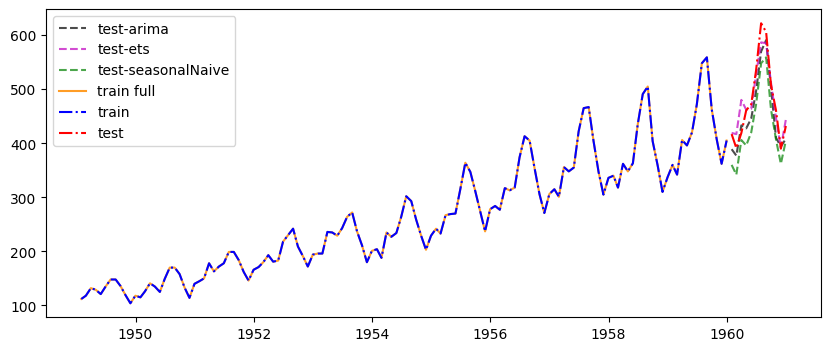

 *** Resultados en el horizonte (Test) *** 
ETS   MAE : 16.222
ARIMA MAE : 25.510
Naive MAE : 47.833
ETS   MAPE: 3.452 %
ARIMA MAPE: 5.272 %
Naive MAPE: 9.988 %


------------------------------
Cantidad puntos remueve:  5
------------------------------


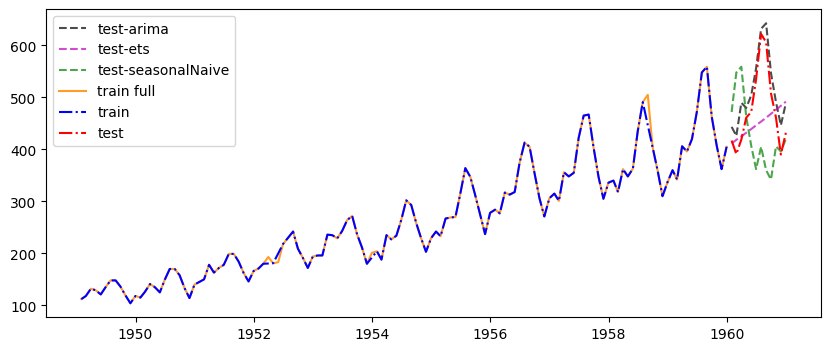

 *** Resultados en el horizonte (Test) *** 
ETS   MAE : 59.263
ARIMA MAE : 36.034
Naive MAE : 107.833
ETS   MAPE: 11.629 %
ARIMA MAPE: 8.027 %
Naive MAPE: 21.475 %


------------------------------
Cantidad puntos remueve:  10
------------------------------


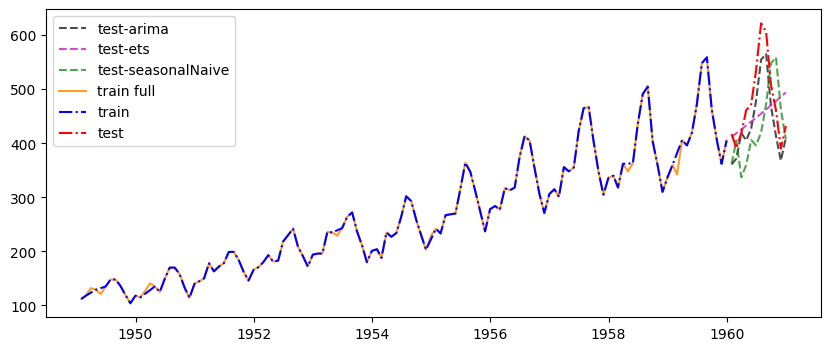

 *** Resultados en el horizonte (Test) *** 
ETS   MAE : 59.264
ARIMA MAE : 39.175
Naive MAE : 85.750
ETS   MAPE: 11.658 %
ARIMA MAPE: 8.053 %
Naive MAPE: 17.203 %


------------------------------
Cantidad puntos remueve:  15
------------------------------


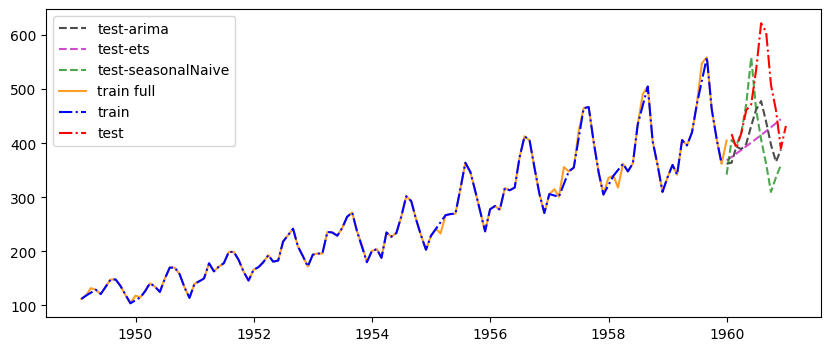

 *** Resultados en el horizonte (Test) *** 
ETS   MAE : 80.755
ARIMA MAE : 70.184
Naive MAE : 79.833
ETS   MAPE: 15.566 %
ARIMA MAPE: 13.892 %
Naive MAPE: 15.904 %


------------------------------
Cantidad puntos remueve:  20
------------------------------


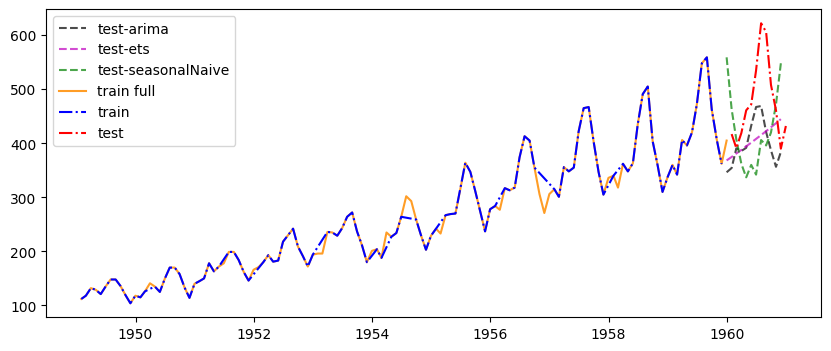

 *** Resultados en el horizonte (Test) *** 
ETS   MAE : 80.759
ARIMA MAE : 77.344
Naive MAE : 122.167
ETS   MAPE: 15.567 %
ARIMA MAPE: 15.498 %
Naive MAPE: 24.580 %


------------------------------
Cantidad puntos remueve:  25
------------------------------


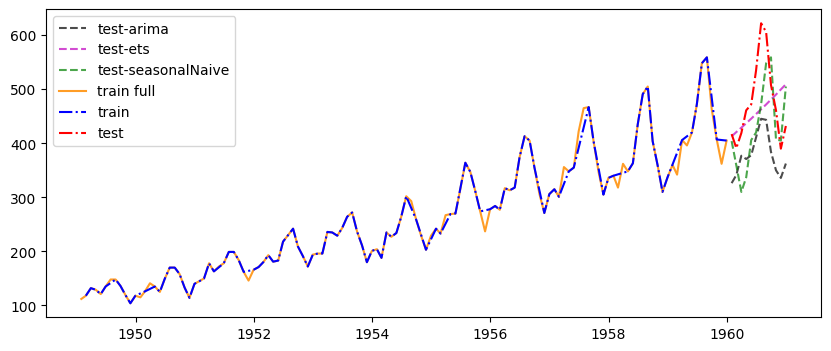

 *** Resultados en el horizonte (Test) *** 
ETS   MAE : 59.285
ARIMA MAE : 99.051
Naive MAE : 71.667
ETS   MAPE: 11.853 %
ARIMA MAPE: 20.072 %
Naive MAPE: 14.656 %


------------------------------
Cantidad puntos remueve:  30
------------------------------


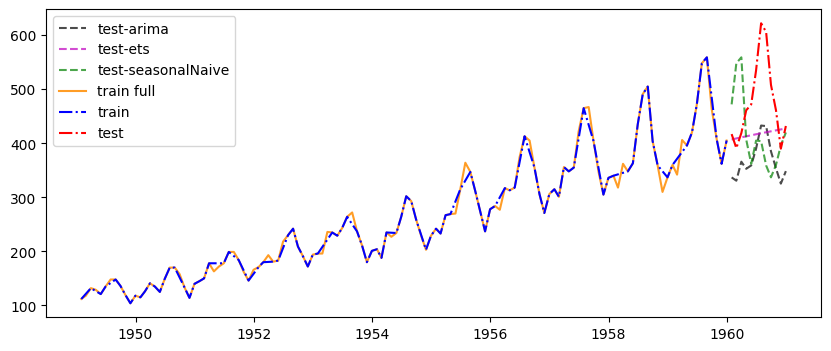

 *** Resultados en el horizonte (Test) *** 
ETS   MAE : 67.674
ARIMA MAE : 108.444
Naive MAE : 116.750
ETS   MAPE: 12.676 %
ARIMA MAPE: 22.028 %
Naive MAPE: 23.481 %


------------------------------
Cantidad puntos remueve:  35
------------------------------


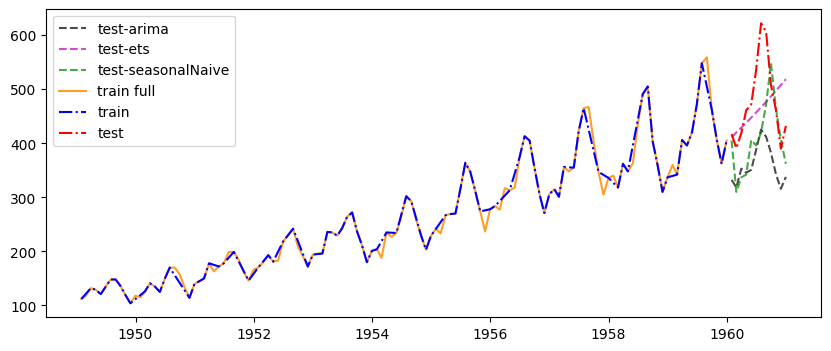

 *** Resultados en el horizonte (Test) *** 
ETS   MAE : 59.741
ARIMA MAE : 117.531
Naive MAE : 80.333
ETS   MAPE: 12.047 %
ARIMA MAPE: 23.982 %
Naive MAPE: 16.033 %


------------------------------
Cantidad puntos remueve:  40
------------------------------


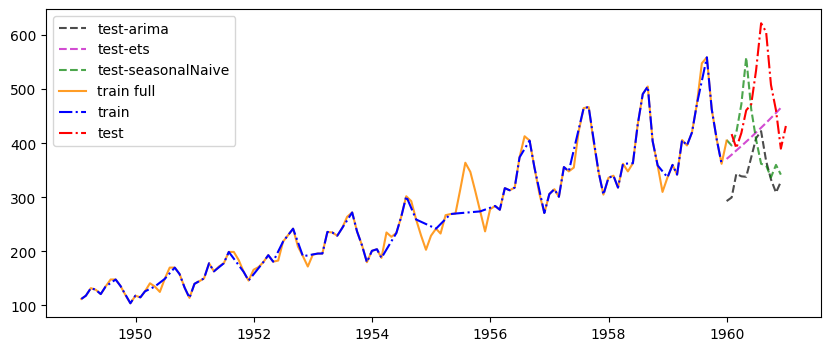

 *** Resultados en el horizonte (Test) *** 
ETS   MAE : 76.060
ARIMA MAE : 129.748
Naive MAE : 86.583
ETS   MAPE: 14.776 %
ARIMA MAPE: 26.723 %
Naive MAPE: 16.501 %


------------------------------
Cantidad puntos remueve:  45
------------------------------


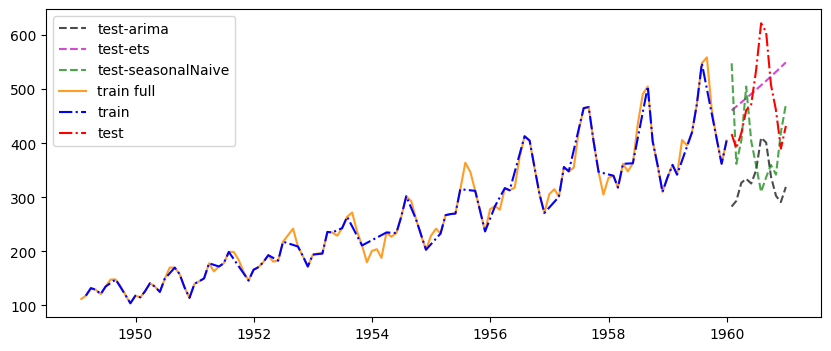

 *** Resultados en el horizonte (Test) *** 
ETS   MAE : 67.978
ARIMA MAE : 144.799
Naive MAE : 115.000
ETS   MAPE: 14.768 %
ARIMA MAPE: 29.927 %
Naive MAPE: 22.123 %


In [173]:
# Entrenar puntos variando la cantidad de datos de Train

# Determinar lista con cantidad de puntos a remover aleatoriamente
minp = 0
maxp = 50
pasop = 5
puntos_remueve= [i for i in range(minp,maxp,pasop)]


######################################
# Datos originales
df = AirPassengersDF

###################
# Dividir datos Train-Test
fecha = '1959-12-31'
train_df_full = df[df.ds<=fecha].copy()

######################################

for puntos in puntos_remueve:
    
    print('\n\n------------------------------')
    print('Cantidad puntos remueve: ',puntos)
    print('------------------------------')
    
    # Leer datos
    df = AirPassengersDF
    
    ###################
    # Dividir datos Train-Test
    
    train_df = df[df.ds<=fecha].copy()
    test_df = df[df.ds>fecha].copy()
    
    ###################
    # Crear variables exogenas para train (X) - Nuevas columnas en X

    # Crear variables nuevas
    train_df['trend'] = np.arange(1,train_df.shape[0] + 1)
    train_df['intercept'] = np.ones(train_df.shape[0])
    train_df['month'] = train_df['ds'].dt.month

    # Codificar variable "month" mediante one-hot encoder
    train_df = pd.get_dummies(train_df, columns=['month'], drop_first=True)

    ###################
    # Remover puntos aleatoriamente de Train
    
    train_df = train_df[~train_df.index.isin(train_df.sample(puntos).index)].copy()
    
    ###################
    # Crear variables exogenas para test (X) - Nuevas columnas en X

    # copiar datos
    xreg_test = test_df[["unique_id","ds"]].copy()

    # crear variables
    xreg_test['trend'] = np.arange(train_df.shape[0]+1 ,test_df.shape[0] + train_df.shape[0] +1)
    xreg_test['intercept'] = np.ones(pred_df.shape[0])
    xreg_test['month'] = xreg_test['ds'].dt.month

    # categorizar variable "month" con one-hot encoder
    xreg_test = pd.get_dummies(xreg_test, columns=['month'], drop_first=True)
    
    ###################
    # Predecir con modelo

    model = StatsForecast(
        df=train_df, 
        models=models, 
        freq='M')

    # prediccion
    pred_xreg = model.forecast(predecir_puntos, X_df=xreg_test)
    pred_xreg = pred_xreg.reset_index()
    
    ###################
    # Visualizar prediccion

    plt.figure(figsize=(10,4))
    v1 = train_df.copy()
    v2 = test_df.copy()
    v3 = pred_xreg.copy()
    
    # Prediccion
    plt.plot(v3['ds'],v3['AutoARIMA'],'--k',label='test-arima',alpha=0.7)
    plt.plot(v3['ds'],v3['ETS'],'--m',label='test-ets',alpha=0.7)
    plt.plot(v3['ds'],v3['SeasonalNaive'],'--g',label='test-seasonalNaive',alpha=0.7)
    
    # Datos
    plt.plot(train_df_full['ds'],train_df_full['y'],'-',color='darkorange',alpha=0.85,label='train full')
    plt.plot(v1['ds'],v1['y'],'-.b',label='train')
    plt.plot(v2['ds'],v2['y'],'-.r',label='test')
    
    plt.legend()
    plt.show()
    
    ###################
    # Evaluar el rendimiento del modelo

    # MAE: Valor de error absoluto promedio
    def mae(y_hat, y_true):
        return np.mean(np.abs(y_hat-y_true))

    # MAPE: Valor de error porcentual absoluto promedio
    def mape(y_hat, y_true):
        return np.mean(np.abs(100.*(y_hat-y_true)/(y_true + 1e-5)))

    print(' *** Resultados en el horizonte (Test) *** ')
    print('ETS   MAE : %0.3f' % mae(v3["ETS"].values, v2["y"].values))
    print('ARIMA MAE : %0.3f' % mae(v3["AutoARIMA"].values, v2["y"].values))
    print('Naive MAE : %0.3f' % mae(v3["SeasonalNaive"].values, v2["y"].values))
    print('ETS   MAPE: %0.3f' % mape(v3["ETS"].values, v2["y"].values),'%')
    print('ARIMA MAPE: %0.3f' % mape(v3["AutoARIMA"].values, v2["y"].values),'%')
    print('Naive MAPE: %0.3f' % mape(v3["SeasonalNaive"].values, v2["y"].values),'%')

De igual manera en el modelo con datos faltantes, se observa que a pesar de tener datos adicionales (exogenos) es sensible a fallar más.